<a href="https://colab.research.google.com/github/RafaelGirardin/Sprint_Engenharia_de_Dados/blob/master/MVP_Sprint_Engenharia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pós-graduação em Ciência de Dados e Analytics**

---

## MVP de Engenharia de Dados

### Autor: Rafael M. G. P. Furtado


## 1. Objetivo


O debate público sobre as variadas formas de violência contra a mulher suscita no Brasil diferentes posicionamentos tanto quanto à definição dos modelos de proteção às agressões por gênero como também à própria validação da misoginia como um problema social urgente a ser enfrentado.

Conforme dados da Ouvidoria Nacional dos Direitos Humanos¹, de janeiro de 2022 até julho do mesmo ano, somaram-se 31 mil denúncias de violências física, sexual, psicológica, moral e patrimonial contra a mulher. Também é notória a extensa subnotificação desses dados, conforme apontam pesquisas sociológicas².

Não obstante a um cenário tão complexo, soma-se ao contexto a dificuldade na eficácia dos mecanismos de proteção a mulher, especialmente no que se refere à aplicação justa das leis, dentre elas a lei 11.340/2006 (Lei "Maria da Penha"), lei 12.737/2012 (Lei "Carolina Dieckman") e lei 14.132/2021 (Lei do "Stalking").

Num sistema judiciário em que a ampla maioria dos juízes são homens, especialmente quando se consideram os mais elevados cargos da magistratura, cogita-se a hipótese do enviesamento na aplicação das referidas leis.

**Assim, tem-se como objetivo desse MVP o estudo de setenças judiciais sobre agressões motivadas por gênero e o levantamento de possíveis vieses na decisão do(a) magistrado(a). É importante esclarecer que a busca por associação entre eventos não representa obrigatoriamente uma relação de causa e efeito, de modo que não se discute a qualidade ou mérito da decisão judicial, sendo os resultados desse trabalho apenas indícios para estudos futuros. Ressalta-se ainda que utilizamos o recorte de um tribunal específico, o qual pode ou não ser representativo do panorama geral brasileiro.**

Para esse trabalho, preferiu-se montar uma Base de Dados própria, baseada em Web Scraping, a partir da página de jurisprudências do Tribunal de Justiça do Estado de São Paulo. Para a abordagem em Web Scraping, foi utilizado o recurso de Selenium e a linguagem C# para a automatização das consultas. Por se tratar de uma página contendo dados públicos e por inexistir qualquer indicativo de proibição do uso de robôs, não foi identificado conflito ético quanto a esse mecanismo. O código-fonte utilizado para os crawlers está disponível para consulta no mesmo repositório do notebook.

De forma mais detalhada, as perguntas que se desejam responder ao final do MVP são:
1.   O número de magistrados homens a julgar processos relacionados à misoginia é discrepante em relação ao número magistradas na mesma tarefa?
2.   É possível identificar alguma associação entre o gênero do magistrado e a setença proferida? Podemos sugerir que homens juízes possuem tendência a decisões mais favoráveis aos réus e juízas, uma tendência mais favorável à condenação deles?
3.   Existe discrepância no provimento das decisões? Há algum(a) juiz(a) cujo número de decisões favoráveis ou contrárias aos réus seja significativamente diferente do conjunto formado pelos demais magistrados?
4.   Quanto à sequência temporal, com o passar dos anos, percebe-se aumento ou diminuição no deferimento das ações movidas pelas alegadas vítimas?
5.   Ainda quanto à sequência temporal, como os crimes contra a mulher evoluíram no que diz respeito aos seus diferentes tipos?


## 2. Coleta dos dados

Conforme foi antecipado na primeira seção do trabalho, o MVP não utilizou uma base de dados pública. Não foi identificado na Web um repositório público de dados com finalidade semelhante a desejada. Assim, a coleta foi feita por meio de Web Scraping, técnica popularmente conhecida como robôs de navegação.

Utilizou-se o framework Selenium, juntamente com drivers de conexão ao navegador Edge fornecidos pela Microsoft. O desenvolvimento foi feito em C#. No repositório do notebook consta toda a implementação do código-fonte. Abaixo, é deixado o link com um vídeo produzido demonstrando a automatização das consultas.

(Colocar o link)

Na página de buscas, foram utilizados os parâmetros:

*   Ementa: "provido" ou "PROVIDO"
*   Assunto: "12194 - Contra a mulher"
*   Origem: "2º grau"
*   Tipo de publicação: "Acórdãos" ou "Decisões monocráticas"
*   Ordenar por: "Data de publicação"

A justificativa para esses parâmetros são:

1.  Decisões em segundo grau representam apelações do reu contra o provimento inicial da queixa motivadora do processo. Assim, uma apelação que conste como "provida" ou "parcialmente provida" significa, na verdade, a absolvição do reu ou a atenuação de sua pena.

2.  O TJSP disponibiliza um código específico para processos relacionados a crimes contra mulher (código "12194" no campo "Assunto"). Isso facilitou a filtragem dos processos de interesse.

3.  A busca por ementas que contenham os termos "provido" ou "PROVIDO" é importante devido ao fato de o TJSP disponibilizar apenas uma prévia da ementa na página principal. A consulta completa demanda resolução de desafios de Captcha, o que dificulta tecnicamente o acesso à decisão integral. Observemos, contudo, que caso a prévia possua algum desses termos, já é possível inferir a orientação do magistrado. Naturalmente, os termos "parcialmente provido" e "não provido" também serão selecionados, por conterem as mesmas palavras-chaves.

Abaixo, tem-se um print da página de buscas:

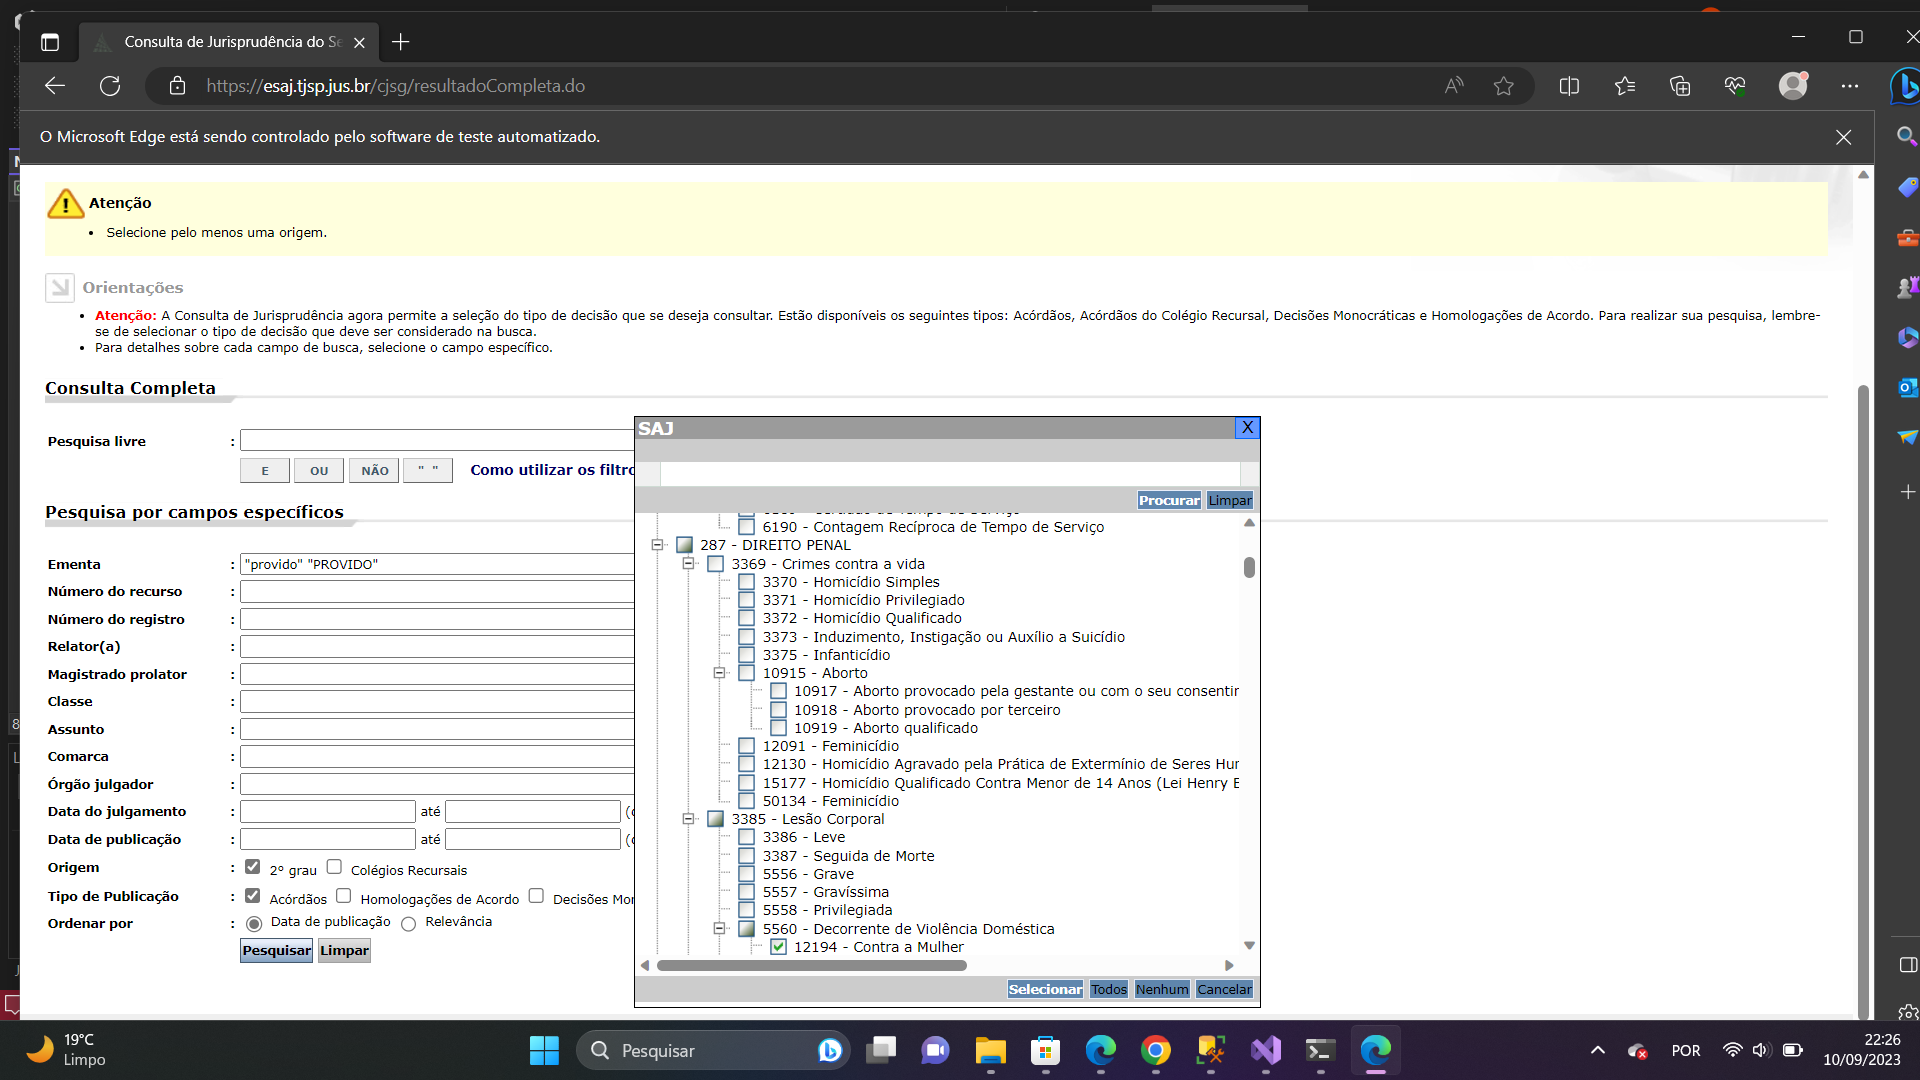

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
import statistics
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

###1.1 Hipóteses

Levanta-se a seguinte hipótese:

1.   Existe correlação significativa entre os atributos Recency, Frequency, Monetary, Time e Donation_In_March_2007, de modo que a partir dos 4 primeiros podemos fazer uma predição quanto ao valor do último. Possivelmente, maior intervalo de tempo entre a primeira doação e a última ou maior frequência junto ao serviço serão relacionados aos casos positivos de doação em Março de 2007.

Por ser apenas uma hipótese, tem-se por objetivo nesse MVP desenvolver as etapas iniciais de um trabalho em Ciência de Dados que permitiriam prosseguir nos modelos de Machine Learning adequados para sua verificação.

## 2. Carga de Dados

Iremos usar o pacote **Pandas** (Python Data Analysis Library) para carregar um arquivo .csv. O arquivo original possui cabeçalho, entretanto, fez-se a opção por substituir os rótulos originais das colunas por outros menos verbosos e assim fornecer uma visualização de dados mais rápida e simples.

Após o Dataset ser carregado, estaremos aptos a seguir com a exploração dos Dados.

In [ ]:
# Carrega arquivo csv usando Pandas usando uma URL
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/RafaelGirardin/MVP-AnaliseExploratoriaDeDados/master/transfusion.csv"

colunas = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donation_In_March_2007']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Vamos iniciar examinando as dimensões do Dataset, suas informações e alguns exemplos de linhas.

In [ ]:
# Mostra as dimensões do dataset
print(dataset.shape)

(748, 5)


Conforme o resultado que obtivemos, confirmamos a informação mencionada acima, isto é, temos um Dataset com **748 linhas** (instâncias), cada uma delas com **5 atributos**.

In [ ]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Recency                 748 non-null    int64
 1   Frequency               748 non-null    int64
 2   Monetary                748 non-null    int64
 3   Time                    748 non-null    int64
 4   Donation_In_March_2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None


Para a linguagem Python, todos os atributos correspondem ao tipo int64 (inteiro de 64 bits). Entretanto, é válido lembrar que o último atributo é, na verdade, uma **variável qualitativa nominal que foi transformada (transformação *label-encoding*)** para os valores 0 (False) ou 1 (True), por razões de simplicidade na programação. Percebemos que as instâncias estão ordenadas de 0 (primeira instância) até 747 (última instância). Temos ainda a informação de que o Dataset corresponde a um volume de dados de 29,3 KB (quilobytes).

In [ ]:
# Mostra as 15 primeiras linhas do dataset
dataset.head(15)

,Recency,Frequency,Monetary,Time,Donation_In_March_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [ ]:
# Mostra as 15 últimas linhas do dataset
dataset.tail(15)

,Recency,Frequency,Monetary,Time,Donation_In_March_2007
733,23,1,250,23,0
734,23,1,250,23,0
735,23,1,250,23,0
736,23,1,250,23,0
737,23,1,250,23,0
738,23,1,250,23,0
739,23,4,1000,52,0
740,23,1,250,23,0
741,23,7,1750,88,0
742,16,3,750,86,0


Os comandos dataset.head() e dataset.tail(), por padrão, exibem as 5 primeiras e 5 últimas linhas do Dataset, respectivamente. Nesse caso, alteramos o padrão para serem exibidas as 15 primeiras linhas e 15 últimas. No conjunto dessas 30 linhas não se observam valores faltantes ou inconsistentes.

Temos na linha de comando abaixo uma outra forma de inspecionar os tipos de dados dos atributos. Essa informação, conforme já discutimos anteriormente, também pode ser obtida com o comando dataset.info().

In [ ]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

Recency                   int64
Frequency                 int64
Monetary                  int64
Time                      int64
Donation_In_March_2007    int64
dtype: object

In [ ]:
# Conjunto de valores modais para os atributos do Dataset
modaRecency = statistics.mode(dataset['Recency'])
modaFrequency = statistics.mode(dataset['Frequency'])
modaMonetary = statistics.mode(dataset['Monetary'])
modaTime = statistics.mode(dataset['Time'])
modaDoacao2007 = statistics.mode(dataset['Donation_In_March_2007'])
print('Valor modal para Recency: %d' % modaRecency)
print('Valor modal para Frequency: %d' % modaFrequency)
print('Valor modal para Monetary: %d' % modaMonetary)
print('Valor modal para Time: %d' % modaTime)
print('Valor modal para Donation_In_March_2007: %d \n' % modaDoacao2007)

# Coeficientes de variação para os atributos do Dataset
cvRecency = dataset['Recency'].std()/dataset['Recency'].mean()
print('Coeficiente de variação para Recency: %.2f' % cvRecency)

cvFrequency = dataset['Frequency'].std()/dataset['Frequency'].mean()
print('Coeficiente de variação para Frequency: %.2f' % cvFrequency)

cvMonetary = dataset['Monetary'].std()/dataset['Monetary'].mean()
print('Coeficiente de variação para Monetary: %.2f' % cvMonetary)

cvTime = dataset['Time'].std()/dataset['Time'].mean()
print('Coeficiente de variação para Time: %.2f \n' % cvTime)

# Amplitude total para os atributos do Dataset
amplitudeRecency = dataset['Recency'].max()-dataset['Recency'].min()
print('Amplitude total de variação para Recency: %d' % amplitudeRecency)

amplitudeFrequency = dataset['Frequency'].max()-dataset['Frequency'].min()
print('Amplitude total de variação para Frequency: %d' % amplitudeFrequency)

amplitudeMonetary = dataset['Monetary'].max()-dataset['Monetary'].min()
print('Amplitude total de variação para Monetary: %d' % amplitudeMonetary)

amplitudeTime = dataset['Time'].max()-dataset['Time'].min()
print('Amplitude total de variação para Time: %d \n' % amplitudeTime)

# Distância interquartil para os atributos do Dataset
distanciaInterquartilRecency = dataset['Recency'].quantile(.75)-dataset['Recency'].quantile(.25)
print('Distância interquartil para Recency: %.2f' % distanciaInterquartilRecency)

distanciaInterquartilFrequency = dataset['Frequency'].quantile(.75)-dataset['Frequency'].quantile(.25)
print('Distância interquartil para Frequency: %.2f' % distanciaInterquartilFrequency)

distanciaInterquartilMonetary = dataset['Monetary'].quantile(.75)-dataset['Monetary'].quantile(.25)
print('Distância interquartil para Monetary: %.2f' % distanciaInterquartilMonetary)

distanciaInterquartilTime = dataset['Time'].quantile(.75)-dataset['Time'].quantile(.25)
print('Distância interquartil para Time: %.2f \n\n' % distanciaInterquartilTime)


# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
cols = list(dataset.columns)
dataset[cols[0:-1]].describe()

Valor modal para Recency: 2
Valor modal para Frequency: 1
Valor modal para Monetary: 250
Valor modal para Time: 4
Valor modal para Donation_In_March_2007: 0 

Coeficiente de variação para Recency: 0.85
Coeficiente de variação para Frequency: 1.06
Coeficiente de variação para Monetary: 1.06
Coeficiente de variação para Time: 0.71 

Amplitude total de variação para Recency: 74
Amplitude total de variação para Frequency: 49
Amplitude total de variação para Monetary: 12250
Amplitude total de variação para Time: 96 

Distância interquartil para Recency: 11.25
Distância interquartil para Frequency: 5.00
Distância interquartil para Monetary: 1250.00
Distância interquartil para Time: 34.00 




,Recency,Frequency,Monetary,Time
count,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086
std,8.095396,5.839307,1459.826781,24.376714
min,0.000000,1.000000,250.000000,2.000000
25%,2.750000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,50.000000,12500.000000,98.000000


Na figura acima, vemos as principais medidas de tendência central (média, mediana e moda), além de medidas de dispersão, como o desvio-padrão e outras medidas de posição (além daquelas de tendência central, ou seja, as medidas separatrizes). **Para distribuições assimétricas e unimodais** como aquelas desses 5 atributos trabalhados, **a mediana é a medida de tendência central que representa os dados com maior eficiência**. Os histogramas, gráficos de densidade e gráficos de pizza que veremos a partir da seção 3.2 comprovarão o caráter assimétrico das distribuições citadas. O comando *dataset.describe()* não traz a moda (valor mais frequente) de cada atributo. Para achar esse valor, importamos a biblioteca *statistics* e usamos o comando *statistics.mode(dataset['NomeColuna'])*.

Temos que a média > mediana > moda em todas as colunas e todas as colunas representam distribuições unimodais, o que caracteriza distribuição assimétrica à direita. A moda é a única medida de tendência central que realmente pode ser calculada para atributos qualitativos. Considerando essa restrição conceitual, optou-se por não exibir a coluna "Donation_In_March_2007" na última tabela.

O cálculo do coeficiente de variação foi feito manualmente, usando a fórmula (desvio_padrao/media_aritmetica). Percebe-se que os dados encontram-se consideralvemtente dispersos ao longo de sua amplitude (coeficiente de variação em todas as colunas > 50%). Isso significa que, nesses casos, as medidas de tendência central **não** são tão eficientes para indicar a região de maior concentração dos dados. A amplitude total também foi calculada manualmente por meio da diferença entre o valor máximo e o mínimo de cada atributo, isto é, dataset['NomeColuna'].max() - dataset['NomeColuna'].min().

Costuma-se dizer que, nas distribuições assimétricas e unimodais (como é o caso de todas as colunas quantitativas do nosso Dataset), as marcações de Q1 (primeiro quartil) e Q3 (terceiro quartil), juntamente com a mediana como tendência central (equivalente ao Q2, segundo quartil) trazem uma descrição mais apropriada para o conjunto de dados, em termos de dispersão e concentração.


Vamos agora verificar se o Dataset tem classes balanceadas na variável qualitativa da útlima coluna para que possamos tratar um eventual desbalanceamento posteriormente, se necessário. Veremos que, para essa coluna, as classes 0 (não realizou doação em Março de 2007) e 1 (realizou doação em Março de 2007) representam respectivamente cerca de 75% e 25% das entradas. Em geral, sempre haverá algum desbalanceamento entre classes. No nosso exemplo, usaremos o ponto de corte 90%/10%, de modo que o desbalanceamento existente possa ser considerado não relevante. **Num cenário real, seria importante contarmos com um Analista de Negócios para entendermos se, de fato, a divisão de classes na ordem de 75% e 25% corresponderia a algo factível de ser encontrado na população de dados que deu origem ao Dataset.**

In [ ]:
# distribuição das classes
distribuicaoClassesDonationInMarch2007 = dataset.groupby('Donation_In_March_2007').size()
print(distribuicaoClassesDonationInMarch2007)

Donation_In_March_2007
0    570
1    178
dtype: int64


### 3.2. Visualizações Unimodais

As visualizações unimodais examinam o comportamento das variáveis de forma isolada e incluem os histogramas, gráficos de densidade e boxplots. Serão criados um gráfico de cada tipo para todos os atributos quantitativos das instâncias do Dataset. Como os gráficos revelam, os atributos Frequency e Monetary, na maior parte de suas distribuições, se comportam de forma aproximadamente exponencial. A variável Recency se distribui em picos (um maior e dois suaves). Na coluna Time, observamos forte comportamento oscilante, embora sua tendência geral seja descendente. Não há distribuição normal em quaisquer dos casos.

#### 3.2.1. Histogramas

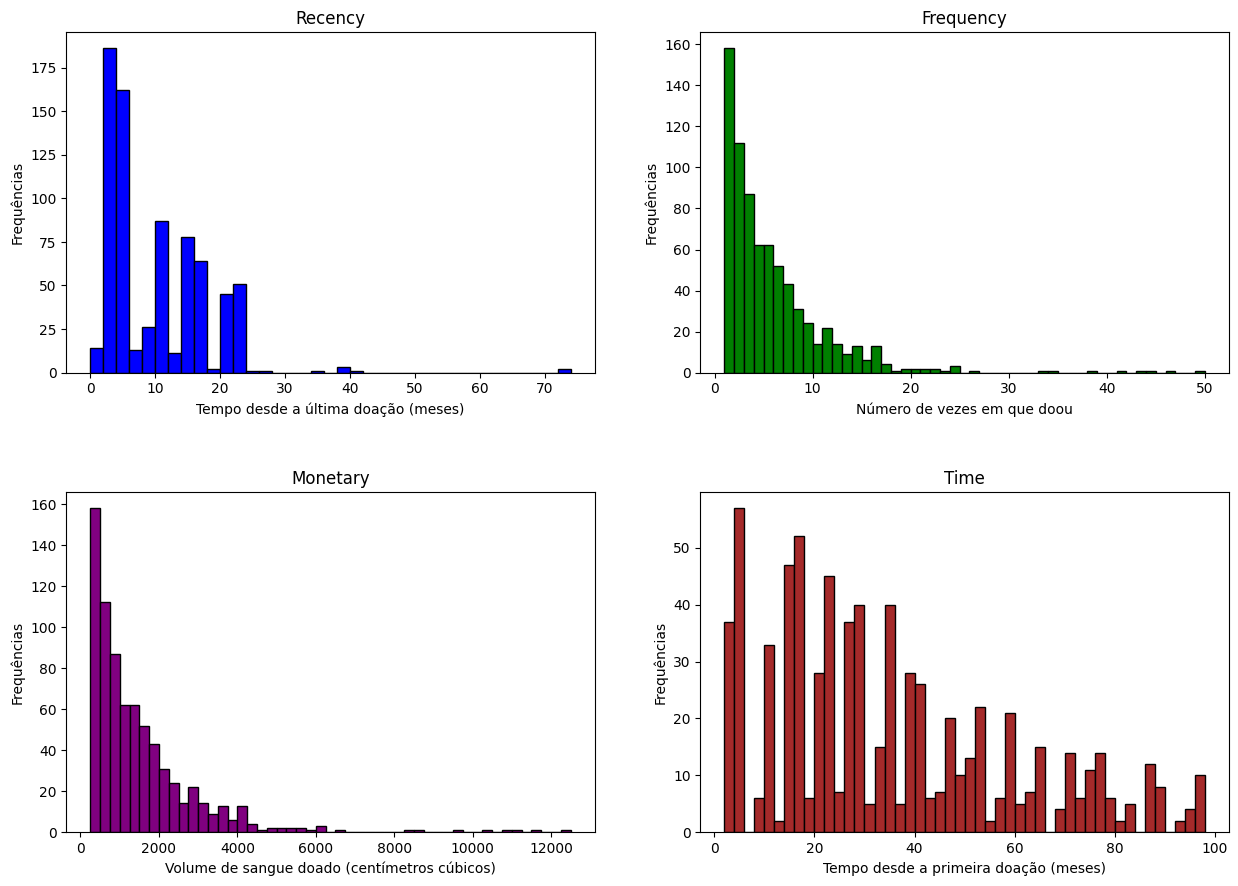

In [ ]:
plt.figure(figsize = ((15, 10)))

# Histograma para Recency
plt.subplot(2, 2, 1)
plt.hist(dataset['Recency'],bins=37,edgecolor='black',color='blue')
plt.title('Recency')
plt.ylabel('Frequências')
plt.xlabel('Tempo desde a última doação (meses)')
plt.plot()

# Histograma para Frequency
plt.subplot(2, 2, 2)
plt.hist(dataset['Frequency'],bins=49,edgecolor='black',color='green')
plt.title('Frequency')
plt.ylabel('Frequências')
plt.xlabel('Número de vezes em que doou')
plt.plot()

# Histograma para Monetary
plt.subplot(2, 2, 3)
plt.hist(dataset['Monetary'],bins=49,edgecolor='black',color='purple')
plt.title('Monetary')
plt.ylabel('Frequências')
plt.xlabel('Volume de sangue doado (centímetros cúbicos)')
plt.plot()

# Histograma para Time
plt.subplot(2, 2, 4)
plt.hist(dataset['Time'],bins=48,edgecolor='black',color='brown')
plt.title('Time')
plt.ylabel('Frequências')
plt.xlabel('Tempo desde a primeira doação (meses)')
plt.plot()

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

Podemos observar no Histograma de Recency uma distribuição em picos, sendo o primeiro bastante acentuado e os dois seguintes suaves. Isso pode representar uma divisão em três comportamentos típicos na frequência junto ao serviço de doação: um primeiro com indivíduos bastante frequentes, um segundo de frequência intermediária e outro pouco frequente. Observamos a **presença de outliers**, especialmente na região do eixo horizontal em que x > 30. Temos situações extremas em que x > 70. Embora sejam valores atípicos, não representam inconsistências, na medida em que uma pessoa pode ficar vários anos sem doar sangue.
Como já foi dito acima, a relação média > mediana > moda indica assimetria à direita.

Os Histogramas de Monetary e Frequency estão correlacionados estreitamente. Na verdade, o autor do Dataset fez a opção de incluir explicitamente a coluna Monetary (volume doado), ainda que seus valores pudessem ser achados por meio da simples relação Monetary = Frequency * 250. Isso implica que os histogramas tem o mesmo formato, obviamente diferindo nas magnitudes registradas na escala horizontal. Temos uma distribuição muito assemelhada a uma curva exponencial decrescente, indicando que a quantidade de indivíduos que acumulam muitas doações (e, por consequência, grande volume doado)  cai de forma bastante acelerada. As distribuições se caracterizam por assimetria à direita pelas mesmas razões já citadas. Existe um conjunto de outliers que começam a se destacar em Frequency nas redondezas de x=20, conforme veremos também nos boxplots.

No Histograma de Time, notamos um padrão interessante e aproximadamente regular de oscilações, de modo que existem diferentes regiões de crescimento e decrescimento no diagrama, embora a tendência geral seja de decrescimento. **A cauda mais "alongada" à direita (vista com maior clareza no gráfico de densidade) minimiza a identificação de outliers**.

Optamos no código por gerar histogramas com um número de barras suficiente para dividir a amplitude em intervalos com extremidades inteiras, facilitando a leitura para variáveis discretas.

#### 3.2.2. Gráficos de Densidade (*Density Plots*)

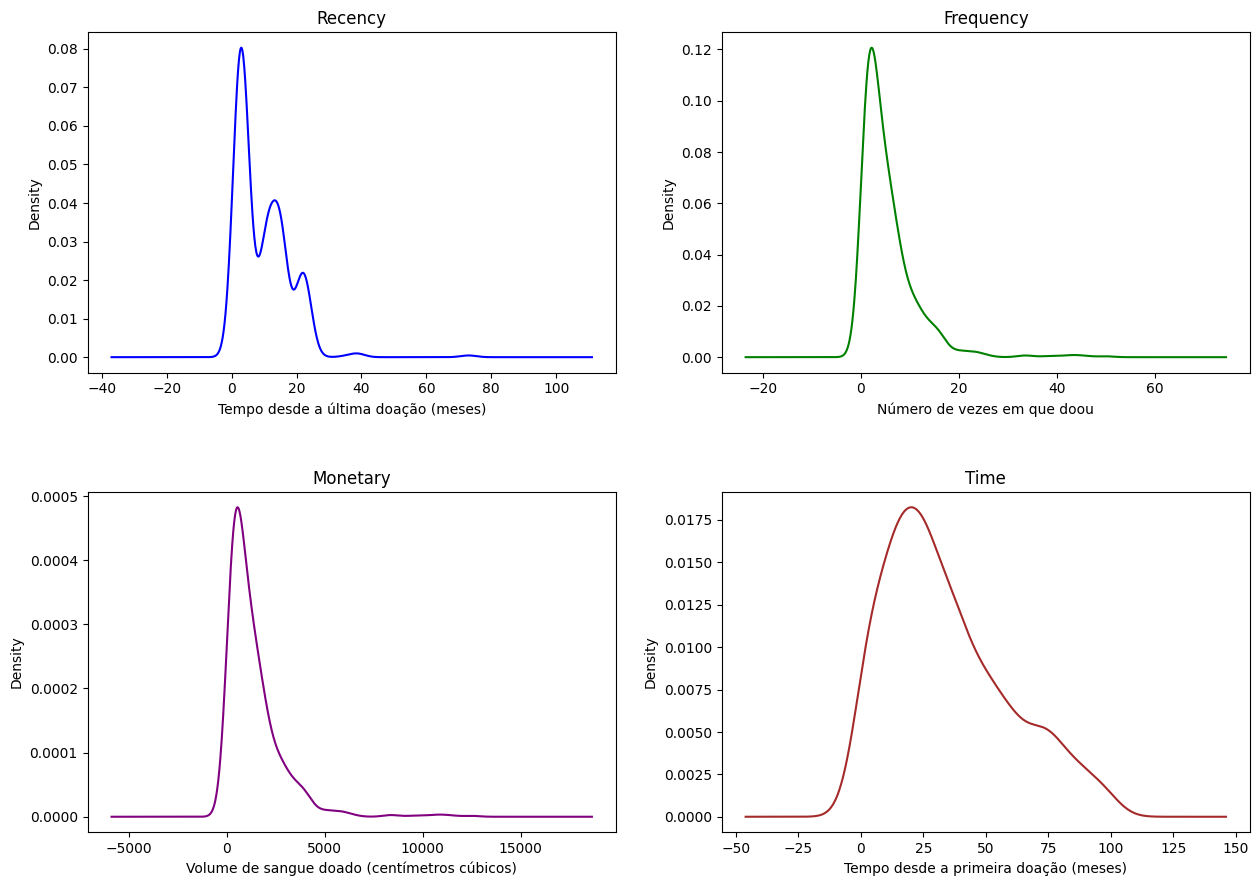

In [ ]:
plt.figure(figsize = ((15, 10)))

# Density Plot para Recency
plt.subplot(2, 2, 1)
dataset['Recency'].plot(kind = 'density', layout = (3,3), sharex = False, color='blue', title='Recency')
plt.xlabel('Tempo desde a última doação (meses)')

# Density Plot para Frequency
plt.subplot(2, 2, 2)
dataset['Frequency'].plot(kind = 'density', layout = (3,3), sharex = False, color='green', title='Frequency')
plt.xlabel('Número de vezes em que doou')

# Density Plot para Monetary
plt.subplot(2, 2, 3)
dataset['Monetary'].plot(kind = 'density', layout = (3,3), sharex = False, color='purple', title='Monetary')
plt.xlabel('Volume de sangue doado (centímetros cúbicos)')

# Density Plot para Time
plt.subplot(2, 2, 4)
dataset['Time'].plot(kind = 'density', layout = (3,3), sharex = False, color='brown', title='Time')
plt.xlabel('Tempo desde a primeira doação (meses)')

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

Muitas vezes, os gráficos de densidade permitem uma visão mais simples e "limpa" do que aquela do histograma correspondente. No entanto, as duas representações seguem a mesma lógica, de modo que podemos relacionar os gráficos de densidade à silhueta traçada a partir de um histograma.

####3.2.3. Boxplots###

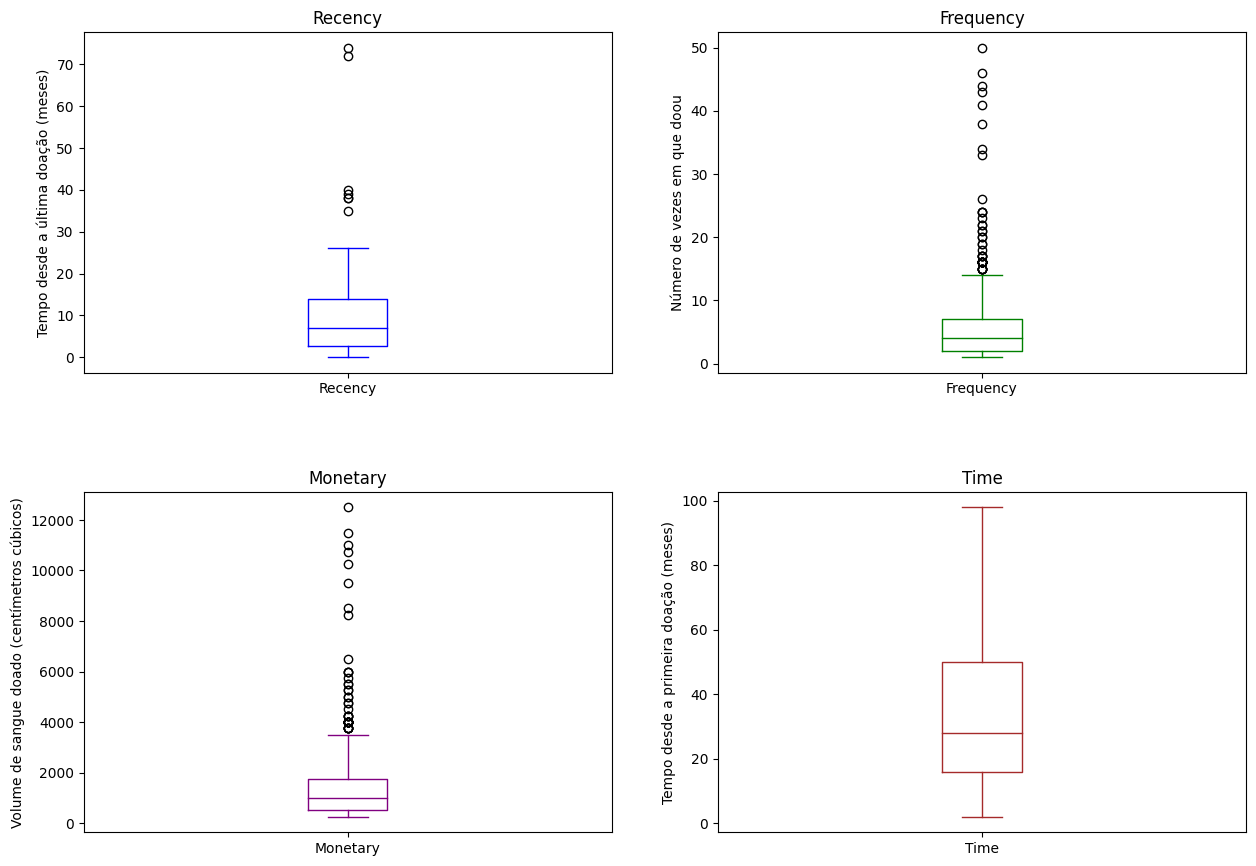

In [ ]:
plt.figure(figsize = ((15, 10)))

# Density Plot para Recency
plt.subplot(2, 2, 1)
dataset['Recency'].plot(kind = 'box', layout = (3,3), sharex = False, color='blue', title='Recency')
plt.ylabel('Tempo desde a última doação (meses)')

# Density Plot para Frequency
plt.subplot(2, 2, 2)
dataset['Frequency'].plot(kind = 'box', layout = (3,3), sharex = False, color='green', title='Frequency')
plt.ylabel('Número de vezes em que doou')

# Density Plot para Monetary
plt.subplot(2, 2, 3)
dataset['Monetary'].plot(kind = 'box', layout = (3,3), sharex = False, color='purple', title='Monetary')
plt.ylabel('Volume de sangue doado (centímetros cúbicos)')

# Density Plot para Time
plt.subplot(2, 2, 4)
dataset['Time'].plot(kind = 'box', layout = (3,3), sharex = False, color='brown', title='Time')
plt.ylabel('Tempo desde a primeira doação (meses)')

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

Nos Boxplots acima, vemos as marcações de cada um dos quartis da respectiva distribuição formando uma caixa retangular com um traço intermediário, que corresponde à Mediana (Q2). **A partir de cada caixa, temos ainda as marcações de limite inferior e superior da distribuição, quando são desconsiderados outliers.** Os outliers são representados pelos círculos ("bolinhas") para além dos limites citados. Em todos os casos, observamos que a distância entre Q1 e Q2 é menor do que a distância entre Q2 e Q3 (mais um indicativo da assimetria). Em Frequency e Monetary, existe grande quantidade de outliers, embora boa parte deles esteja muito próxima do limite superior, o que indica certa arbitrariedade na definição de outlier. Em Recency, o número de outliers é menor e eles estão distantes do limite superior. Nesse aspecto, temos em tal diagrama outliers mais bem caracterizados, o que **não** significa necessariamente problema ou insconsistência no dado. Buscou-se manter as cores de cada atributo em todos os tipos de diagrama construídos. Em Time, não vemos outliers e os limites superior e inferior são extensos. Isso provavelmente é ocasionado pela "cauda" alongada à direita da distribuição, mais bem vista no gráfico de densidade correspondente.

####3.2.4. Gráfico de pizza###

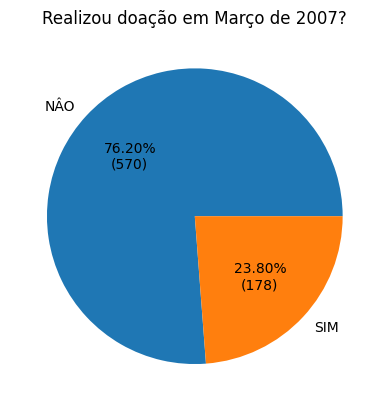

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(distribuicaoClassesDonationInMarch2007, autopct = make_autopct(distribuicaoClassesDonationInMarch2007), labels=['NÂO','SIM']);
plt.title('Realizou doação em Março de 2007?')
plt.show()

Uma vez que a variável Donation_In_March_2007 é qualitativa, o gráfico de pizza é uma boa opção para representá-la. Percebemos a partir da representação o aspecto binário do atributo (presença de apenas duas classes mutuamente exclusivas). O gráfico evidencia a participação proporcional de cada classe comparada ao todo. Optou-se por exibir o valor dessa participação no interior de cada setor circular para transmitir maior exatidão. Isso foi feito por meio de uma função específica que exibe tanto a participação proporcional (porcentagem) quanto o valor absoluto a que ela corresponde.

### 3.3. Visualizações Multimodais

Nas visualizações multimodais, temos por objetivo inspecionar o relacionamento das variáveis, duas a duas. **Nessa etapa, é importante que estejamos atentos a eventuais *insights* quanto ao fenômeno de covariância no nosso Dataset**, ou seja, quando os atributos demonstram algum tipo de comportamento inter-dependente.

####3.3.1. Matriz de correlação

Na matriz abaixo, podemos identificar os valores do coeficiente de correlação de Pearson para cada combinação de variáveis, duas a duas. Existem alguns tipos de coeficiente de correlação diferentes e cada qual adota uma abordagem distinta para o cálculo. **No caso específico do coeficiente de Pearson, mede-se a correlação linear. Coeficiente de correlação igual a 1 significa que as grandezas analisadas variam perfeitamente em proporção direta. Coeficiente de correlação igual a -1 significa que as grandezas analisadas variam perfeitamente em proporção inversa**. Quanto mais próximo de alguma dessas extremidades for o número encontrado, também mais próxima de uma reta está a relação entre as variáveis (ponto de vista geométrico). Valores próximos de 0 indicam que o aumento de uma variável algumas vezes se associa a aumentos da segunda variável, outras vezes se associa com a sua diminuição.

É interessante (e esperado) que as variáveis Frequency e Monetary exibam coeficiente de correlação igual a 1, já que, como foi dito anteriormente Monetary = Frequency * 250.

Alguns autores classificam as correlações em fraca, moderada e forte; outros classificam apenas em fraca e forte. Por simplicidade, vamos adotar o último caso e considerar que coeficientes maiores que 0,5 indicam relacionamento forte. Nesse caso, além da perfeita correlação positiva entre Frequency e Monetary, temos a correlação forte (marcada em azul claro) entre Frequency e Monetary com Time. Isso indica que voluntários que fizeram a primeira doação há bastante tempo se mantiveram razoavelmente frequentes para doações posteriores e, obviamente, também puderam doar um volume maior de sangue.

Todos os outros valores são indicativos de correlação fraca e, portanto, não é possível identificar um padrão bem-definido entre o aumento de uma variável com o aumento ou diminuição da outra.

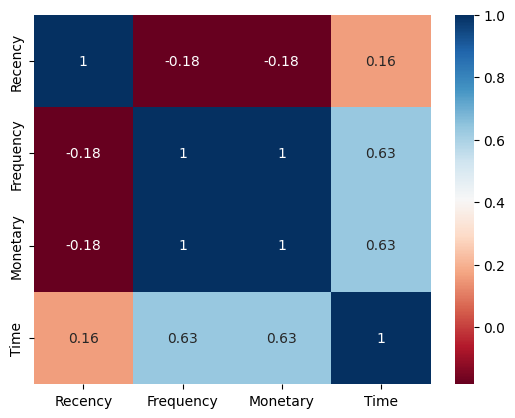

In [ ]:
# Matriz de Correlação com Matplotlib Seaborn
col = list(dataset.columns)
sns.heatmap(dataset[col[0:-1]].corr(), annot=True, cmap='RdBu');

####3.3.2. Diagrama de Dispersão (Scatter Plots)

No diagrama de dispersão, temos a visualização gráfica do relacionamento entre as variáveis (combinadas duas a duas). Cada ponto representa uma instância do Dataset como um par ordenado, em que a abcissa é o atributo indicado no eixo horizontal e a ordenada, o atributo no eixo vertical. De certo modo, o coeficiente de correlação estudado na seção anterior seria um resumo do gráfico de dispersão correspondente. Como variáveis qualitativas não podem ser representadas sobre eixos de um plano cartesiano, a forma de separação das instâncias por classe ocorre pela cor. Temos que a cor laranja indica 1 (realizou doação em Março de 2007) e a cor azul simboliza 0 (não realizou doação em Março de 2007).

Como já comentamos, era esperado que os pontos com coordenadas Frequency e Monetary descrevessem uma reta, devido à relação diretamente proporcional citada em seções anteriores.

Pelos gráficos de dispersão Frequency x Time, observamos uma tendência nítida de os pontos terem maior valor de Time, conforme aumenta-se Frequency, o que corrobora a correlação positiva forte identificada entre esses atributos na seção anterior. Ainda nesse gráfico, os casos de classe 1 revelam certa tendência a terem valores um pouco maiores de Frequency.

Os demais gráficos de dispersão também condizem com os valores de correlação fraca já calculados, de modo que o aumento de uma variável não implica claramente seja no aumento ou na diminuição da segunda.

Por último, em conjunto com a análise de dispersão, temos também a construção de gráficos de densidade separados por classe. Observamos nesses gráficos que as curvas da classe 0 tem aclives e declives muito mais acentuados do que as curvas de classe 1. Isso se justifica, em parte, pelo fato de a classe 0 ter bem mais frequência na distribuição do que a classe 1. Logo, era algo também previsível.

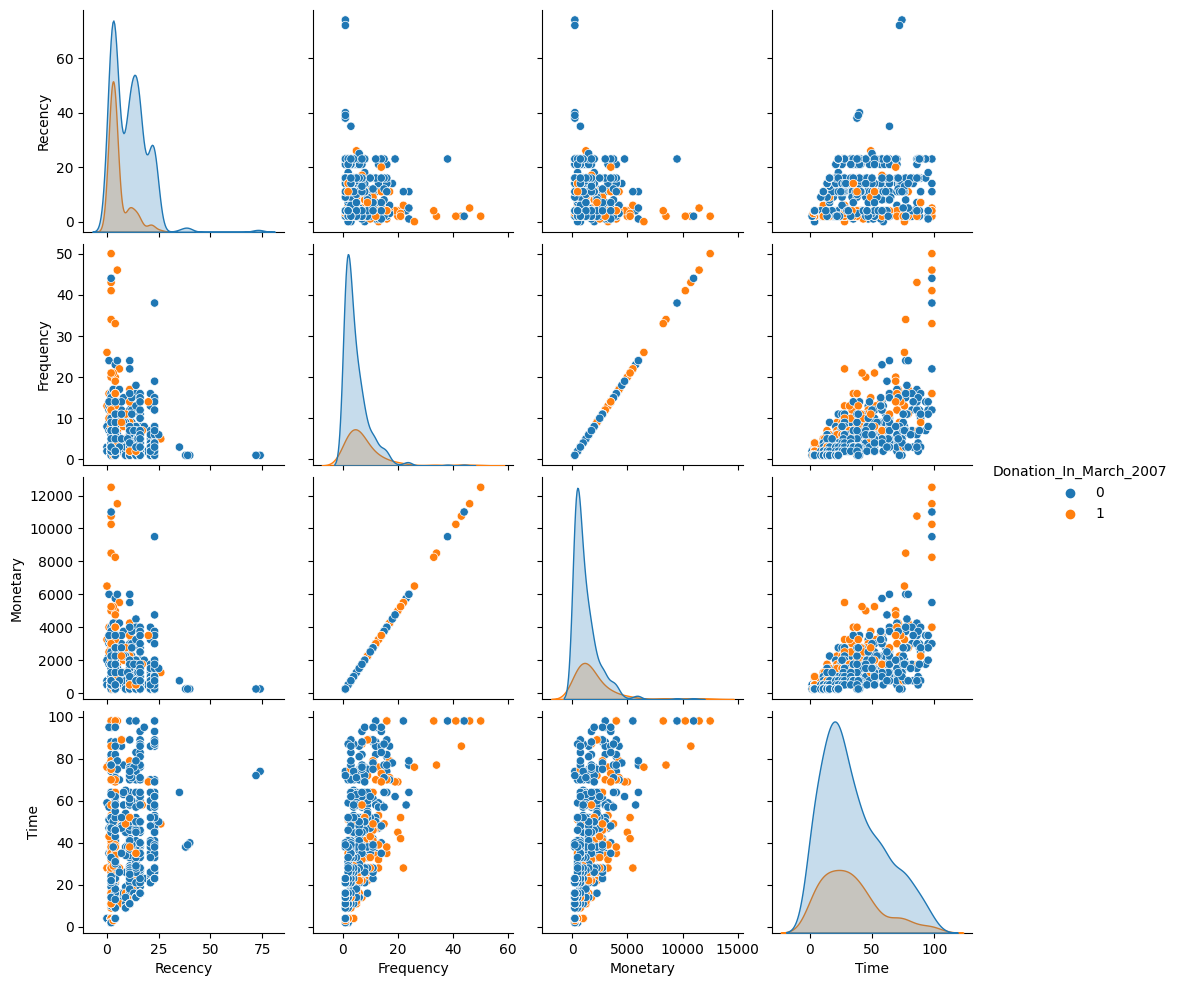

In [ ]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(dataset, hue="Donation_In_March_2007");

## 4. Pré-Processamento de dados

Na etapa de pré-processamento, nosso objetivo é preparar o Dataset, isto é, torná-lo mais adequado para os passos seguintes, envolvendo Machine Learning. **Um Dataset bem ajustado certamente aumentará a eficiência, performance e as chances de que obtenhamos um bom modelo de predição para o problema definido, diminuindo a possibilidade de retrabalho.** É uma etapa que precisa contar com o Analista de Negócios, porque lida extensivamente com o domínio dos dados em questão. Inclui o tratamento de Missings ou dados inconsistentes, transformação de dados, eventuais desbalanceamentos existentes nos atributos, etc...

O Dataset escolhido para esse MVP não deu grande abertura para que exemplificássemos as técnicas de pré-processamento de forma ampla, porque não possui missings evidentes ou inferidos, não possui dados que sejam obviamente inválidos ou inconsistentes. Além disso, também não temos acesso à população dos dados do qual ele foi extraído ou a um Analista de Negócios, para que tentássemos obter alguma salvaguarda a respeito do balanceamento/desbalanceamento nos atributos, especialmente no atributo Donation_In_March_2007.

### 4.1. Tratamento de Missings e Limpeza

**O Dataset em que estamos trabalhando não tem missings evidentes ou outros que possam ser inferidos.** O comando abaixo contabiliza o total de nulos de cada atributo e, ao executá-lo, poderemos confirmar a inexistência desse valor nas colunas.

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

Recency                   0
Frequency                 0
Monetary                  0
Time                      0
Donation_In_March_2007    0
dtype: int64

As colunas Recency e Time são medidas do tempo em número de meses. Na etapa de exploração dos dados, pudemos verificar que em ambas as colunas temos dados do tipo inteiro (int64). **Considerando o intervalo de variação* de ambas as colunas e a consequente amplitude total já calculada (74 para Recency, 96 para Time), não é possível observar valores discrepantes (negativos ou incompatíveis com o tempo de vida do ser-humano, por exemplo)**. Logo, não é necessária qualquer operação de limpeza nessas colunas.

*OBS: Embora saibamos que nas colunas numéricas o valor 0 possa representar um missing, não parece ser esse o caso do Dataset. O valor 0 aparece apenas em Recency e, como boa barte dos valores para esse atributo são pequenos (valor modal = 2), o mais provável é que 0 signifique que não há 1 mês completo desde a última doação.

Na terceira aula de Análise Exploratória de Dados vimos que: "*No mundo real, os datasets podem ter muitas características, e muitos algoritmos de Machine Learning funcionam melhor se a dimensionalidade for menor*". Nosso Dataset apresenta uma coluna irrelevante (Monetary) e ela será removida, numa técnica de pré-processamento chamada **Feature Selection**. O fato de esse atributo ser o simples produto de Frequency por 250 faz com que as características básicas da distribuição de Monetary sejam as mesmas das de Frequency, exceto, obviamente, pela escala dessas características. **Considerou-se, portanto, haver uma redundância implícita no Dataset**.

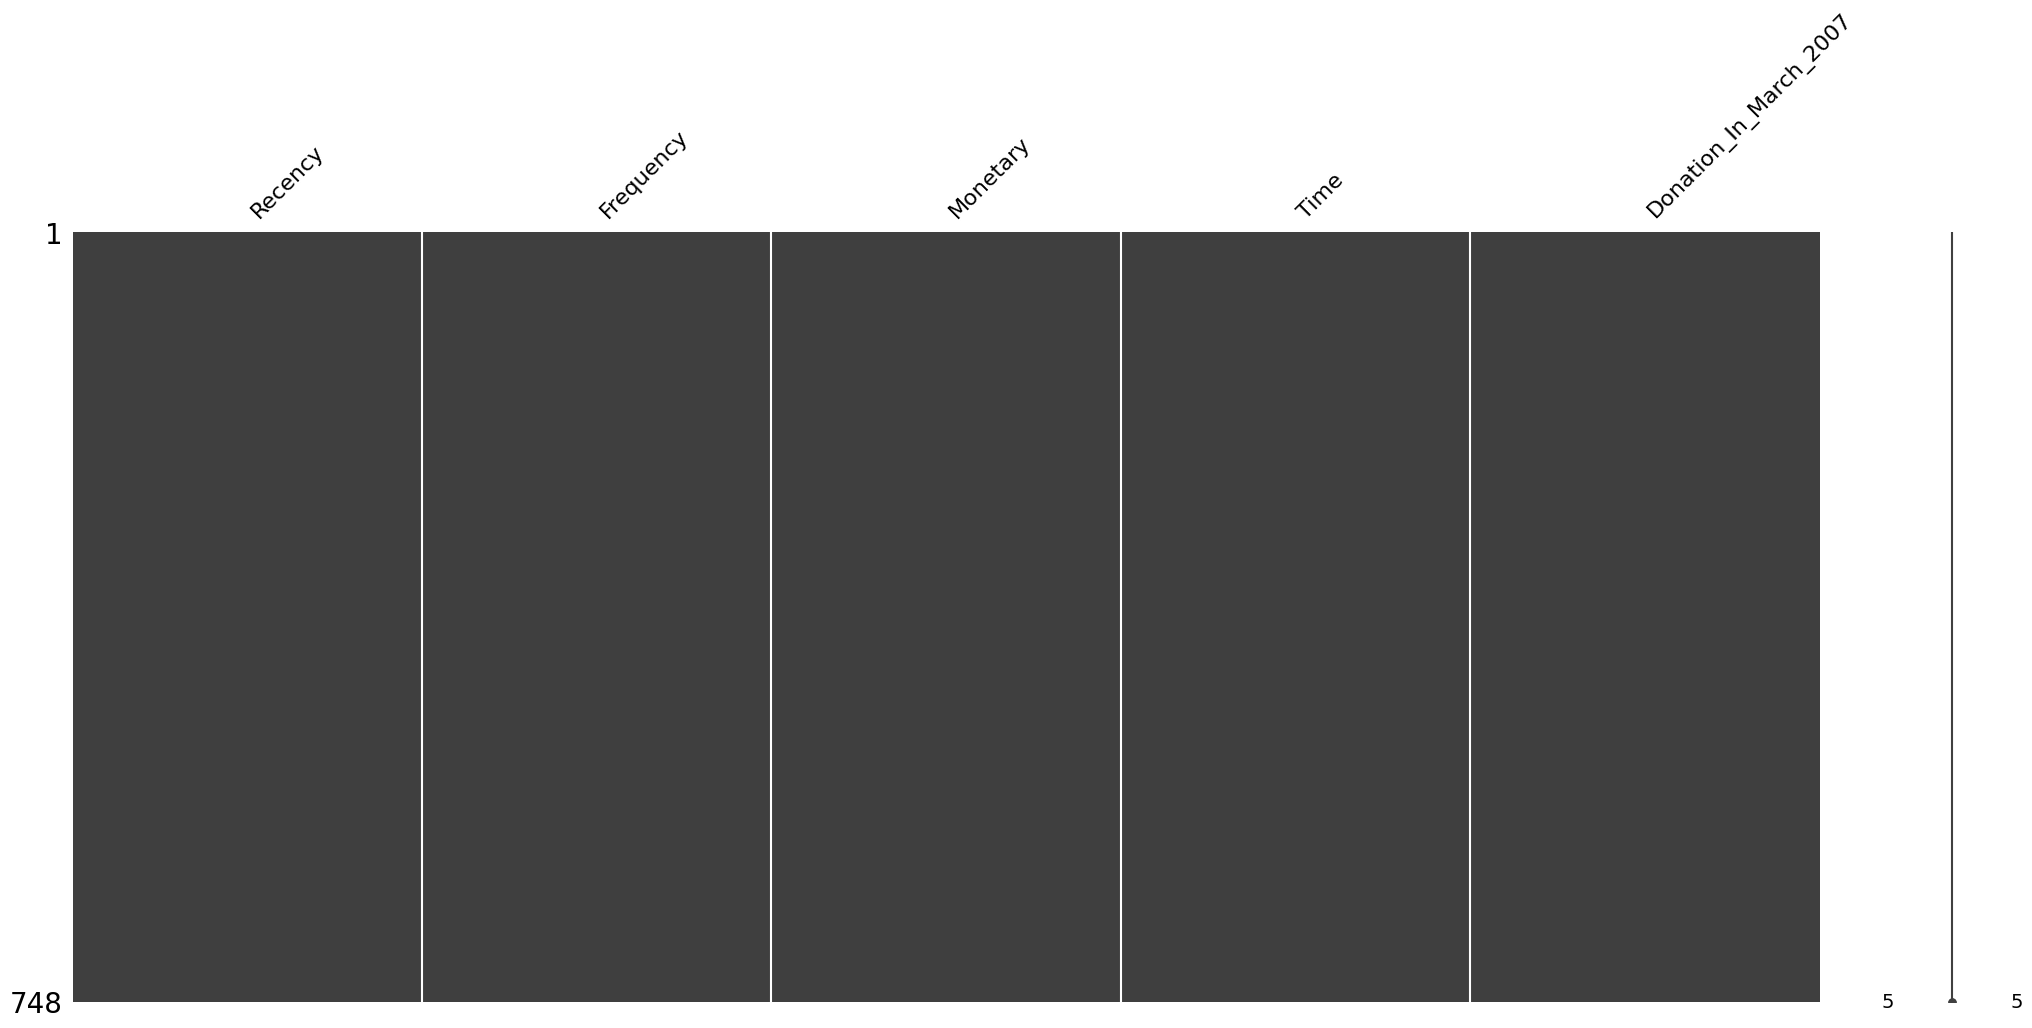

In [ ]:
col = list(dataset.columns)

# criando um dataset auxiliar que passará por limpeza, para não sobrescrever o anterior.
atributos = dataset[col]

# exibindo visualização matricial da nulidade do dataset (observe que, na verdade, não há nulos!)
ms.matrix(atributos)

# removendo a coluna Monetary
atributos.drop(['Monetary'], axis=1, inplace= True)

In [ ]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# exibindo as primeiras linhas
datasetSemMissings.head()

,Recency,Frequency,Time,Donation_In_March_2007
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0


In [ ]:
# exibindo as última linhas
datasetSemMissings.tail()

,Recency,Frequency,Time,Donation_In_March_2007
743,23,2,38,0
744,21,2,52,0
745,23,3,62,0
746,39,1,39,0
747,72,1,72,0


### 4.2. Normalização

No nosso Dataset, todos os atributos tem distribuição assimétrica e, portanto, desviante do padrão Normal de Gauss. Nesse caso, é interessante seguir com a normalização dos atributos, já que muitos algoritmos de Machine Learning performam melhor sobre dados que se distribuem num intervalo de menor comprimento. **Entretanto, é fundamental lembrar que a normalização demonstrada a seguir deveria ser feita, na verdade, após a divisão do Dataset nos conjuntos de Treino e de Validação, a fim de não incorrermos no fenômeno conhecido como Data Leakage.** Deste modo, o que será mostrado na sequência é apenas uma ilustração pedagógica da operação de pré-processamento chamada normalização e não o procedimento em contexto amplo e executado com todo o rigor devido.

In [ ]:
# Separando os valores do dataset em componentes de input (X) e output (Y)
X = datasetSemMissings.values[:,0:3]
Y = datasetSemMissings.values[:,3]

# Normalizando os dados
rescaledX = MinMaxScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n", datasetSemMissings.values)
print("\nDados Normalizados (não inclui a coluna class): \n\n", rescaledX)

Dados Originais: 

 [[ 2 50 98  1]
 [ 0 13 28  1]
 [ 1 16 35  1]
 ...
 [23  3 62  0]
 [39  1 39  0]
 [72  1 72  0]]

Dados Normalizados (não inclui a coluna class): 

 [[0.02702703 1.         1.        ]
 [0.         0.24489796 0.27083333]
 [0.01351351 0.30612245 0.34375   ]
 ...
 [0.31081081 0.04081633 0.625     ]
 [0.52702703 0.         0.38541667]
 [0.97297297 0.         0.72916667]]


### 4.3. Separação em conjunto de treino e conjunto de teste

**Para modelos de Aprendizado Supervisionado, como esse do nosso MVP, a literatura recomenda fortemente a divisão do Dataset em conjunto de treino e conjunto de validação.** Essa é uma diferença interessante frente ao Aprendizado Não-Supervisionado, que não faz tal recomendação, precisamente porque não dispõe de um Dataset rotulado.

No primeiro exemplo abaixo, é simulado o particionamento em conjunto de treino/conjunto de testes usando o Dataset original. No segundo exemplo, temos a mesma técnica, porém usando o Dataset gerado na etapa de pré-processamento.

Observe ainda que a variável "test_size" define a porcentagem do Dataset que será usada no conjunto de testes (nos casos abaixo, 20%). A variável "seed" é aplicada quando queremos fixar os resultados do particionamento do Dataset, isso é importante quando diferentes cientistas de dados participam ou verificam o desenvolvimento. Em tese, poderíamos guardar qualquer inteiro nessa variável e a cada inteiro escolhido corresponderia um conjunto de testes e um conjunto de treino específicos. A forma do comando para particionamento sem estratificação foi deixada comentada, para constar apenas como referência de outra possibilidade durante esse processo.

In [ ]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = dataset.values
X = array[:,0:4]
y = array[:,4]

#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [ ]:
# Separação em conjuntos de treino e teste (dataset sem missings - 1 coluna a menos!)
array = datasetSemMissings.values
X_sm = array[:,0:3]
y_sm = array[:,3]

#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação